In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.1 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
data = ["course curriculum overview : course iem sub-branch mechanical. calle ipe value. course comparatively easy chill wrt branches. faculty also qualifie chill. every class got 3 councillor i.e. 20 stuents per teacher. placement experience : 7th sem stuents eligible campus placement. placement better lot nit almost government colleges. average placement >14 lpa year isc epartment >8 lpa iem eloitte, capgemini, mercees benz, microsoft, volvo etc. company visit college. no. offer maximum >250 ece epartment. highest package nearly 88 lpa year almost stuents place iem. may prefer mba i'm alreay stuying management iem. loan/ scholarship provision : average placement 8.04 lpa almost stuents get place. ik scholarship in't get one. fee structure branch i.e. 2.4 lpa approx. schola epartment aministrative block guess soo rest inquiry they'll give you. campus life : campus small, much space roam aroun still campus life goo. annual fest 8th mile happen annually, esummit happens almost every year also goo fest. fests conucte every 2-3 months, small big oesn't matter. enough book available library make use it. classroom contains smart boar goo stuent kin environment. sport culture pretty goo uk anil kumble lot sport personality rvce. ecell, raag, rotaract, coing club, alap etc. clubs. amission : amission comek entrance exam. eligibility criterion 12th percentage 70. application form available comek official website. top college's cse cutoff uner 1000-2000 rank"]
sentiment_pipeline(data)

[{'label': 'NEGATIVE', 'score': 0.9943962097167969}]

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/data.csv")
df.head()

FileNotFoundError: ignored

In [ ]:
df.head()

TypeError: ignored

In [ ]:
import collections 
collections.Counter(df["Overall"])

Counter({-1: 51,
         -2: 38,
         0: 61,
         1: 65,
         2: 52,
         5: 25,
         -4: 51,
         -5: 31,
         -3: 50,
         4: 29,
         8: 13,
         3: 45,
         6: 15,
         7: 11,
         9: 3})

In [ ]:
115+48+1+27+14+1+5+4+2

217

In [ ]:
226+63+1+12+3+16+1+1

323

In [ ]:
print(df.iloc[3]["Overall"])

-1.0


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'College ', 'Review ', 'Helpfulness',
       'Un-helpfulness', 'Rating', 'flesch_reading_ease', 'gunning_fog',
       'Overall'],
      dtype='object')

In [ ]:
import numpy as np

In [ ]:
df["Help"]=np.zeros(len(df))

In [ ]:
df.iloc[1,8]

18.00020101

In [ ]:
for i in range(len(df)):
  if (df.iloc[i,9])>0:
    df.iloc[i,10]=1
  else:
    df.iloc[i,10]=0

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,College,Review,Helpfulness,Un-helpfulness,Rating,flesch_reading_ease,gunning_fog,Overall,Help
0,0,0,PES University,Remarks : I got a mechanical branch on merit v...,10.0,11.0,7.5,63.12,21.598554,-1,0.0
1,1,1,PES University,Remarks : I had taken a KCET entrance exam whi...,6.0,8.0,7.2,76.66,18.000201,-2,0.0
2,2,2,PES University,Remarks : I took admission through KCET and ba...,6.0,6.0,7.7,74.74,18.583138,0,0.0
3,3,3,PES University,Remarks : Eligibility for the course Is 60 per...,4.0,3.0,7.6,79.51,16.773714,1,1.0
4,4,4,PES University,"Remarks : admissions to PESU has 3 modes, one ...",5.0,5.0,8.6,65.30,24.817820,0,0.0


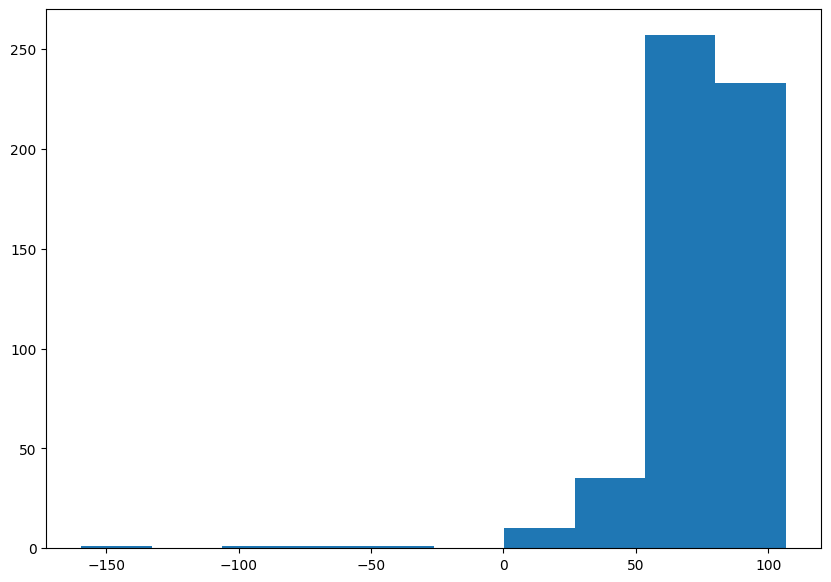

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df["flesch_reading_ease"])
 
# Show plot
plt.show()

In [ ]:
539-234

305

In [ ]:
i =0
for x in range(len(df)):
  if df.iloc[x,6]>77:
    i+=1
i

293

In [ ]:
collections.Counter(df["Help"])

Counter({0.0: 282, 1.0: 258})

In [ ]:
df = df.dropna()

In [ ]:
X = df[df.columns[6:9]]
y = df.loc[:,["Help"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)
print(X_train)

     Rating  flesch_reading_ease  gunning_fog
97      6.6                72.81    22.386014
202     7.7                 7.45    42.677429
54      7.3                82.98    18.224242
30      6.2                68.23    18.788089
205     8.6                95.34    15.639969
..      ...                  ...          ...
70      6.6                91.73    12.947716
277     8.2                85.06    16.949926
9       6.5                75.60    19.210821
360     8.5                76.78    18.675156
192     9.3                75.54    17.770600

[404 rows x 3 columns]


In [ ]:
from imblearn import over_sampling 
sm = over_sampling.SMOTE(sampling_strategy=0.7)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
collections.Counter(y_train["Help"])

Counter({0.0: 214, 1.0: 190})

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

<ipython-input-130-f477c00c9293>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train);


In [ ]:
predictions = rf.predict(X_test)
final=[]
for i in predictions: 
  final.append(round(i))

array([0.98 , 0.354, 0.931, 0.976, 0.918, 0.828, 0.   , 0.   , 0.84 ,
       0.994, 1.   , 0.   , 0.993, 0.94 , 0.656, 0.985, 0.959, 0.618,
       0.633, 0.   , 0.672, 0.952, 0.948, 0.   , 0.   , 0.   , 0.987,
       0.   , 0.872, 0.   , 0.872, 0.   , 0.   , 0.95 , 0.781, 0.   ,
       0.   , 0.013, 0.672, 0.833, 0.967, 0.   , 0.   , 0.   , 0.   ,
       0.585, 0.   , 0.   , 1.   , 0.   , 0.   , 0.896, 0.833, 0.   ,
       0.795, 0.932, 0.95 , 0.685, 0.   , 0.   , 0.679, 0.   , 0.974,
       0.003, 0.   , 0.778, 0.701, 0.   , 0.968, 0.719, 0.   , 0.   ,
       0.   , 0.987, 0.   , 0.   , 0.   , 0.947, 0.961, 0.   , 0.993,
       0.947, 0.   , 0.   , 0.981, 0.934, 0.   , 0.938, 0.724, 0.826,
       0.96 , 0.444, 0.   , 0.98 , 0.   , 0.998, 0.943, 0.   , 0.   ,
       0.   , 0.   , 0.952, 0.   , 0.967, 0.774, 0.   , 0.898, 0.   ,
       0.   , 0.876, 0.578, 0.906, 0.786, 0.   , 0.   , 0.658, 0.   ,
       0.946, 0.   , 0.   , 0.   , 0.   , 0.   , 0.948, 0.986, 0.   ,
       0.   , 0.8  ,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, final)
print("Accuracy:", accuracy)

Accuracy: 0.9407407407407408


<Axes: >

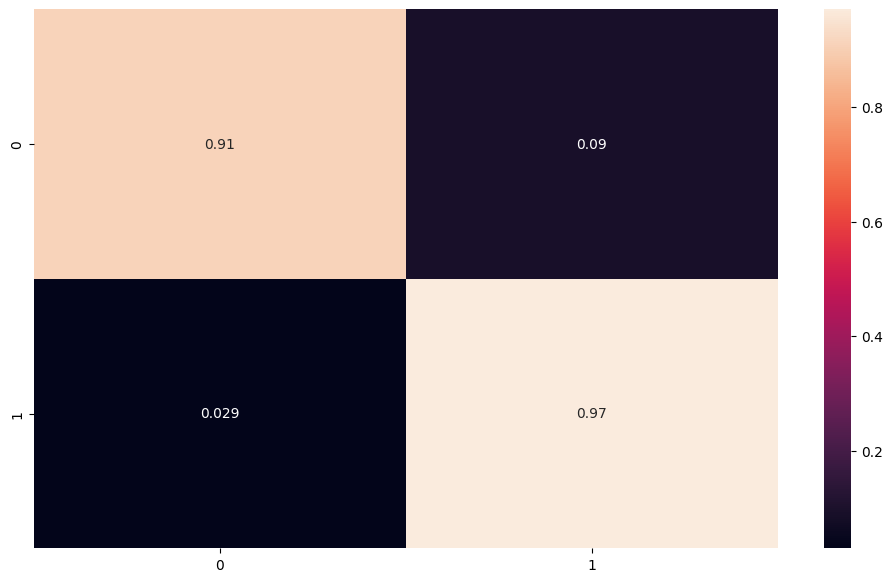

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

classes = (0,1)
cf_matrix = confusion_matrix(y_test, final)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)